# Równoważenia obciążenia przez alokację shardów

Inicjalizacja środowiska

In [156]:
import pprint
import operator
import numpy as np
import matplotlib.pyplot as plt

pp = pprint.PrettyPrinter(indent=1, width=140)

Inicjalizacja wektora obciążeń poszczególnych shardów (F)

In [157]:
np.random.seed(23456789)

F = np.random.randint(1,9, size=(35, 200))
pp.pprint(F)

array([[7, 7, 7, ..., 7, 1, 3],
       [5, 3, 5, ..., 3, 8, 1],
       [5, 3, 3, ..., 1, 2, 3],
       ...,
       [8, 5, 5, ..., 7, 7, 2],
       [3, 5, 3, ..., 1, 8, 6],
       [2, 3, 2, ..., 5, 4, 7]])


Wyznaczenie ilości węzłów chmury (n)

In [158]:
n = 20

Wyznaczenie sumarycznego wektora obciążenia całej chmury

In [159]:
wts = map(sum, zip(*F))

Wyznaczenie względnego obciążenia przypadającego na jeden węzeł chmury

In [160]:
nwts = sum(list(wts))

Sortowanie względem modułu

In [161]:
F=sorted([x * n for x in F],key=sum)

Alokowanie wektorów shardów względem posortowanego obciążenia

In [162]:
N = [[0 for y in F[x]] for x in range(0, n)]
for shard in F:
    abs1 = sum(map(abs,map(operator.sub, wts,shard)))
    maxValue = None
    maxNodeIndex = None

    for index, node in enumerate(N):
        
        if(sum(node) >= nwts):
            continue
            
        temp = [node,shard]
        abs2 =  sum(map(abs,map(operator.sub, wts, [sum(x) for x in zip(*temp)])))
        
        value=abs2-abs1
        
        if(maxValue is None or value > maxValue):
            maxValue=value
            maxNodeIndex=index
    
    # suma dwoch wektorow
    N[maxNodeIndex]=list(map(operator.add, N[maxNodeIndex], list(shard)))

#powrocenie do zmniejszonej o n 
N=[[x/n for x in f] for f in N]

Określenie średniej mocy chmury

In [163]:
power = 15

Wyznaczenie średniego obciążenia w czasie każdego węzła chmury

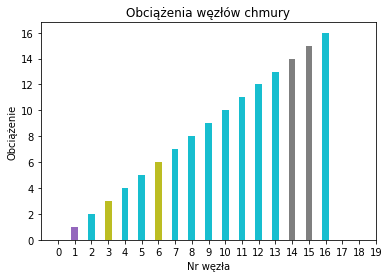

In [164]:
width = 0.4
Narray = np.array(N)

for index, value in enumerate(N):
    plt.bar(Narray[:,index], list(Narray[:,index]), width)
plt.xlabel("Nr węzła")
plt.ylabel("Obciążenie")
plt.xticks(range(0,n))
plt.title("Obciążenia węzłów chmury")
plt.show()

Wyznaczenie średniego przeciążenia każdego węzła chmury

In [165]:
loadN = list()
for node in N:
    nodeLoad = 0
    for index, value in enumerate(node):
        load = value-power
        if(load > 0):
            if(index < len(node)-1):
                node[index+1] += load
            nodeLoad += load
        
    loadN.append(nodeLoad)

pp.pprint(loadN)

[4.0, 4.0, 2.0, 2.0, 4.0, 3.0, 3.0, 4.0, 7.0, 3.0, 4.0, 8.0, 7.0, 5.0, 3.0, 3.0, 4.0, 0, 0, 0]


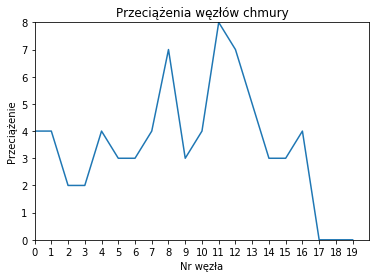

In [166]:
plt.plot(loadN)
plt.xlabel("Nr węzła")
plt.ylabel("Przeciążenie")
plt.axis([0, n, 0, max(loadN)])
plt.xticks(range(0,n))
plt.title("Przeciążenia węzłów chmury")
plt.show()